# Visualization of Material Flows

{1: 1, 2: 2, 3: 5, 4: 6, 5: 7, 6: 8, 7: 3, 8: 4, 9: 9, 10: 12, 34: 33, 33: 10, 31: 34, 35: 35, 36: 36, 37: 37, 38: 40, 39: 41, 47: 39, 48: 49, 49: 50, 50: 11, 51: 51, 52: 53, 53: 54, 32: 38, 54: 52, 11: 13, 12: 14, 13: 15, 14: 16, 15: 17, 16: 18, 17: 19, 18: 20, 19: 21, 20: 22, 21: 23, 22: 24, 23: 25, 24: 26, 25: 27, 26: 28, 27: 29, 28: 30, 29: 31, 30: 32, 40: 42, 41: 43, 42: 44, 43: 45, 44: 46, 45: 47, 46: 48}


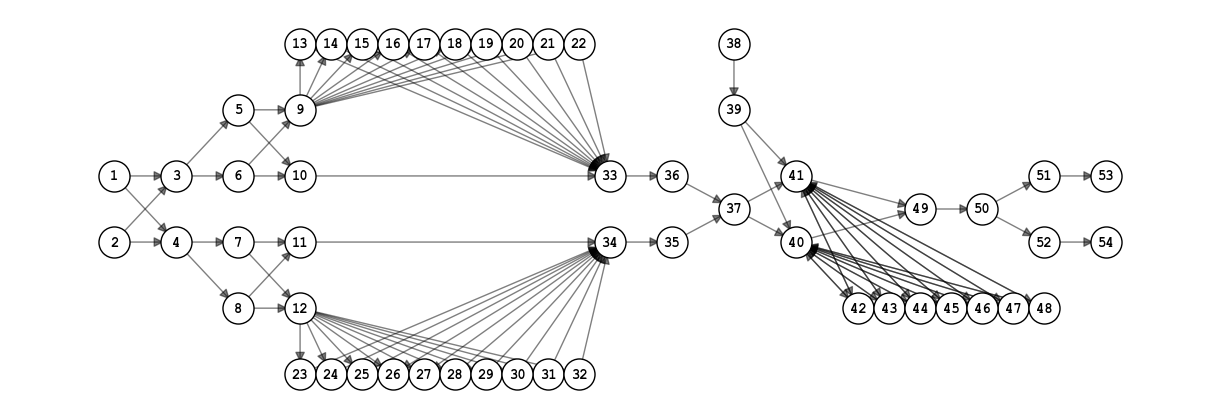

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

# Create a directed graph
G = nx.DiGraph()

new_node_labels = {
    1: "Wareneingang Rampe 1",
    2: "Wareneingang Rampe 2",
    3: "Röntgengerät 1",
    4: "Röntgengerät 2",
    5: "CTS 1",
    6: "CTS 2",
    7: "CTS 3",
    8: "CTS 4",
    9: "CV Retouren 1",
    10: "CV Polybag Neuware 1",
    11: "CV Polybag Neuware 2",
    12: "CV Retouren 2",
    13: "Retouren AP 1",
    14: "Retouren AP 2",
    15: "Retouren AP 3",
    16: "Retouren AP 4",
    17: "Retouren AP 5",
    18: "Retouren AP 6",
    19: "Retouren AP 7",
    20: "Retouren AP 8",
    21: "Retouren AP 9",
    22: "Retouren AP 10",
    23: "Retouren AP 11",
    24: "Retouren AP 12",
    25: "Retouren AP 13",
    26: "Retouren AP 14",
    27: "Retouren AP 15",
    28: "Retouren AP 16",
    29: "Retouren AP 17",
    30: "Retouren AP 18",
    31: "Retouren AP 19",
    32: "Retouren AP 20",
    33: "Faltanlage 1",
    34: "Faltanlage 2",
    35: "Autostore Carousel Inbound 1",
    36: "Autostore Carousel Inbound 2",
    37: "Autostore",
    38: "Gurkipack Faltanlage",
    39: "Karton Label 1",
    40: "Autostore Carousel Outbound 1",
    41: "Autostore Carousel Outbound 2",
    42: "VAS Station 1",
    43: "VAS Station 2",
    44: "VAS Station 3",
    45: "VAS Station 4",
    46: "VAS Station 5",
    47: "VAS Station 6",
    48: "VAS Station 7",
    49: "Karton Verschluss",
    50: "Karton Label 2",
    51: "Versandvorbereitung 1",
    52: "Versandvorbereitung 2",
    53: "Warenausgang Rampe 1",
    54: "Warenausgang Rampe 2"
}

# Define the nodes with their integer labels
old_node_labels = {
    1: "Wareneingang Rampe 1", # 10000
    2: "Wareneingang Rampe 2", # 10000
    3: "CTS 1", # 5000
    4: "CTS 2", # 5000
    5: "CTS 3", # 5000
    6: "CTS 4", # 5000
    7: "Röntgengerät 1", # 10000
    8: "Röntgengerät 2", # 10000
    9: "CV Retouren 1", # 3500
    10: "CV Retouren 2", # 3500
    34: "Faltanlage 1", # 3607
    33: "CV Polybag Neuware 1", # 6500
    31: "Faltanlage 2", # 3607
    35: "Autostore Carousel Inbound 1", # 10000
    36: "Autostore Carousel Inbound 2", # 10000
    37: "Autostore", # 20000
    38: "Autostore Carousel Outbound 1", # 10000
    39: "Autostore Carousel Outbound 2", # 10000
    47: "Karton Label 1", # 20000
    48: "Karton Verschluss", # 20000
    49: "Karton Label 2", # 20000
    50: "CV Polybag Neuware 2", # 6500
    51: "Versandvorbereitung 1", # 10000
    52: "Warenausgang Rampe 1", # 10000
    53: "Warenausgang Rampe 2", # 10000
    32: "Gurkipack Faltanlage", # 20000
    54: "Versandvorbereitung 2" # 10000
    }

# Add Arbeitsstationen 1-20
for i in range(11, 31):
    old_node_labels[i] = f"Retouren AP {i - 10}" # 175 each

# Add labels for VAS Station 1-7
old_node_labels.update({i: f"VAS Station {i - 39}" for i in range(40, 47)}) # 285 each

# Add nodes to the graph
sorted_keys = sorted(old_node_labels.keys(), key=lambda x: old_node_labels[x])
G.add_nodes_from(sorted_keys)

# Define the edges
old_edges = [
    (1,7), (1,8), (2,7), (2,8),
    (7, 3), (7, 4),
    (8, 5), (8, 6),
    (3, 9), (4, 9),
    (5, 10), (6, 10),
    (3, 33), (4, 33),
    (5, 50), (6, 50),
    (33,34),
    (50,31),
    (31,35),(34,36),
    (35,37),(36,37),
    (37,39),(37,38),
    (47,38),(47,39),
    (38,48),(39,48),
    (48,49),(49,51),
    (51,52),
    (32,47),
    (49,54),(54,53)
]

# input: old node , output: new node
old_to_new_mapping = {}
new_reversed = {v:k for k,v in new_node_labels.items()}
for key, value in old_node_labels.items():
    old_to_new_mapping[key] = new_reversed[value]
print(old_to_new_mapping)


# Add edges from CV Retouren nodes to Arbeitsstation nodes
for i in range(11, 21):
    old_edges.append((9, i))
for i in range(21,31):
    old_edges.append((10, i))
# Add edges from each node 11 to 30 to Faltanlage Retouren 1
for i in range(11, 21):
    old_edges.append((i, 34))
for i in range(21,31):
    old_edges.append((i, 31))
old_edges.extend([(38, i) for i in range(40, 47)])
old_edges.extend([(39, i) for i in range(40, 47)])
old_edges.extend([(i, 38) for i in range(40, 47)])
old_edges.extend([(i, 39) for i in range(40, 47)])

new_edges = []
for old_start, old_end in old_edges:
    new_start = old_to_new_mapping[old_start]
    new_end = old_to_new_mapping[old_end]
    new_edges.append((new_start,new_end))

# Add edges to the graph
G.add_edges_from(new_edges)

# Define fixed positions for the nodes
r = 3 # right shift
old_pos = {
    1: (0, 3),
    2: (0, 1),
    3: (2, 5),
    4: (2, 3),
    5: (2, 1),
    6: (2, -1),
    7: (1, 3),
    8: (1, 1),
    9: (3,5),
    10: (3, -1)
}
# Add positions for Arbeitsstation nodes
for i in range(11, 21):
    old_pos[i] = (3 + (i/2 - 11/2), 7) #(4, 13 - (i - 11))
for i in range(21, 31):
    old_pos[i] = (3-5 + (i/2 - 11/2), -3) #(4, 8 - (i - 11))
# VAS Stations
for i in range(40, 47):
    old_pos[i] = ((i/2-20)+9+r, -1)   # (9, (i - 40) - 7)
old_pos[31] = (5+3,1)
old_pos[33] = (3,3)
old_pos[34] = (5+r,3)
old_pos[35] = (6+r,1)
old_pos[36] = (6+r,3)
old_pos[37] = (7+r, 2)
old_pos[38] = (8+r,1)
old_pos[39] = (8+r,3)
old_pos[47] = (7+r,5)
old_pos[48] = (10+r,2)
old_pos[49] = (11+r,2)
old_pos[50] = (3, 1)
old_pos[51] = (12+r,3)
old_pos[52] = (13+r,3)
old_pos[53] = (13+r,1)
old_pos[32] = (7+r,7)
old_pos[54] = (12+r,1)

new_pos = {}
for node, position in old_pos.items():
    new_pos[old_to_new_mapping[node]] = position

# Draw the graph
nx.draw(G, new_pos, with_labels=True, node_size=500,
        node_color="white", edgecolors="black", font_size=10, font_weight="bold",font_family="Courier New", arrows=False,
        width=0)
# Draw edges with 50% opacity
nx.draw_networkx_edges(G, new_pos, edgelist=new_edges, arrowstyle='-|>', arrowsize=15, edge_color='black', alpha=0.5)

# legend_labels = {i: f"{i}: {label}" for i, label in node_labels.items()}
# legend_texts = [f"{value}" for _, value in legend_labels.items()]
# legend = "\n".join(legend_texts)
# plt.figtext(0.02, 0.02, legend, horizontalalignment='left', verticalalignment='bottom', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
# plt.title("Partiell Gerichteter Graph Intralogistik Materialfluss")
plt.show()


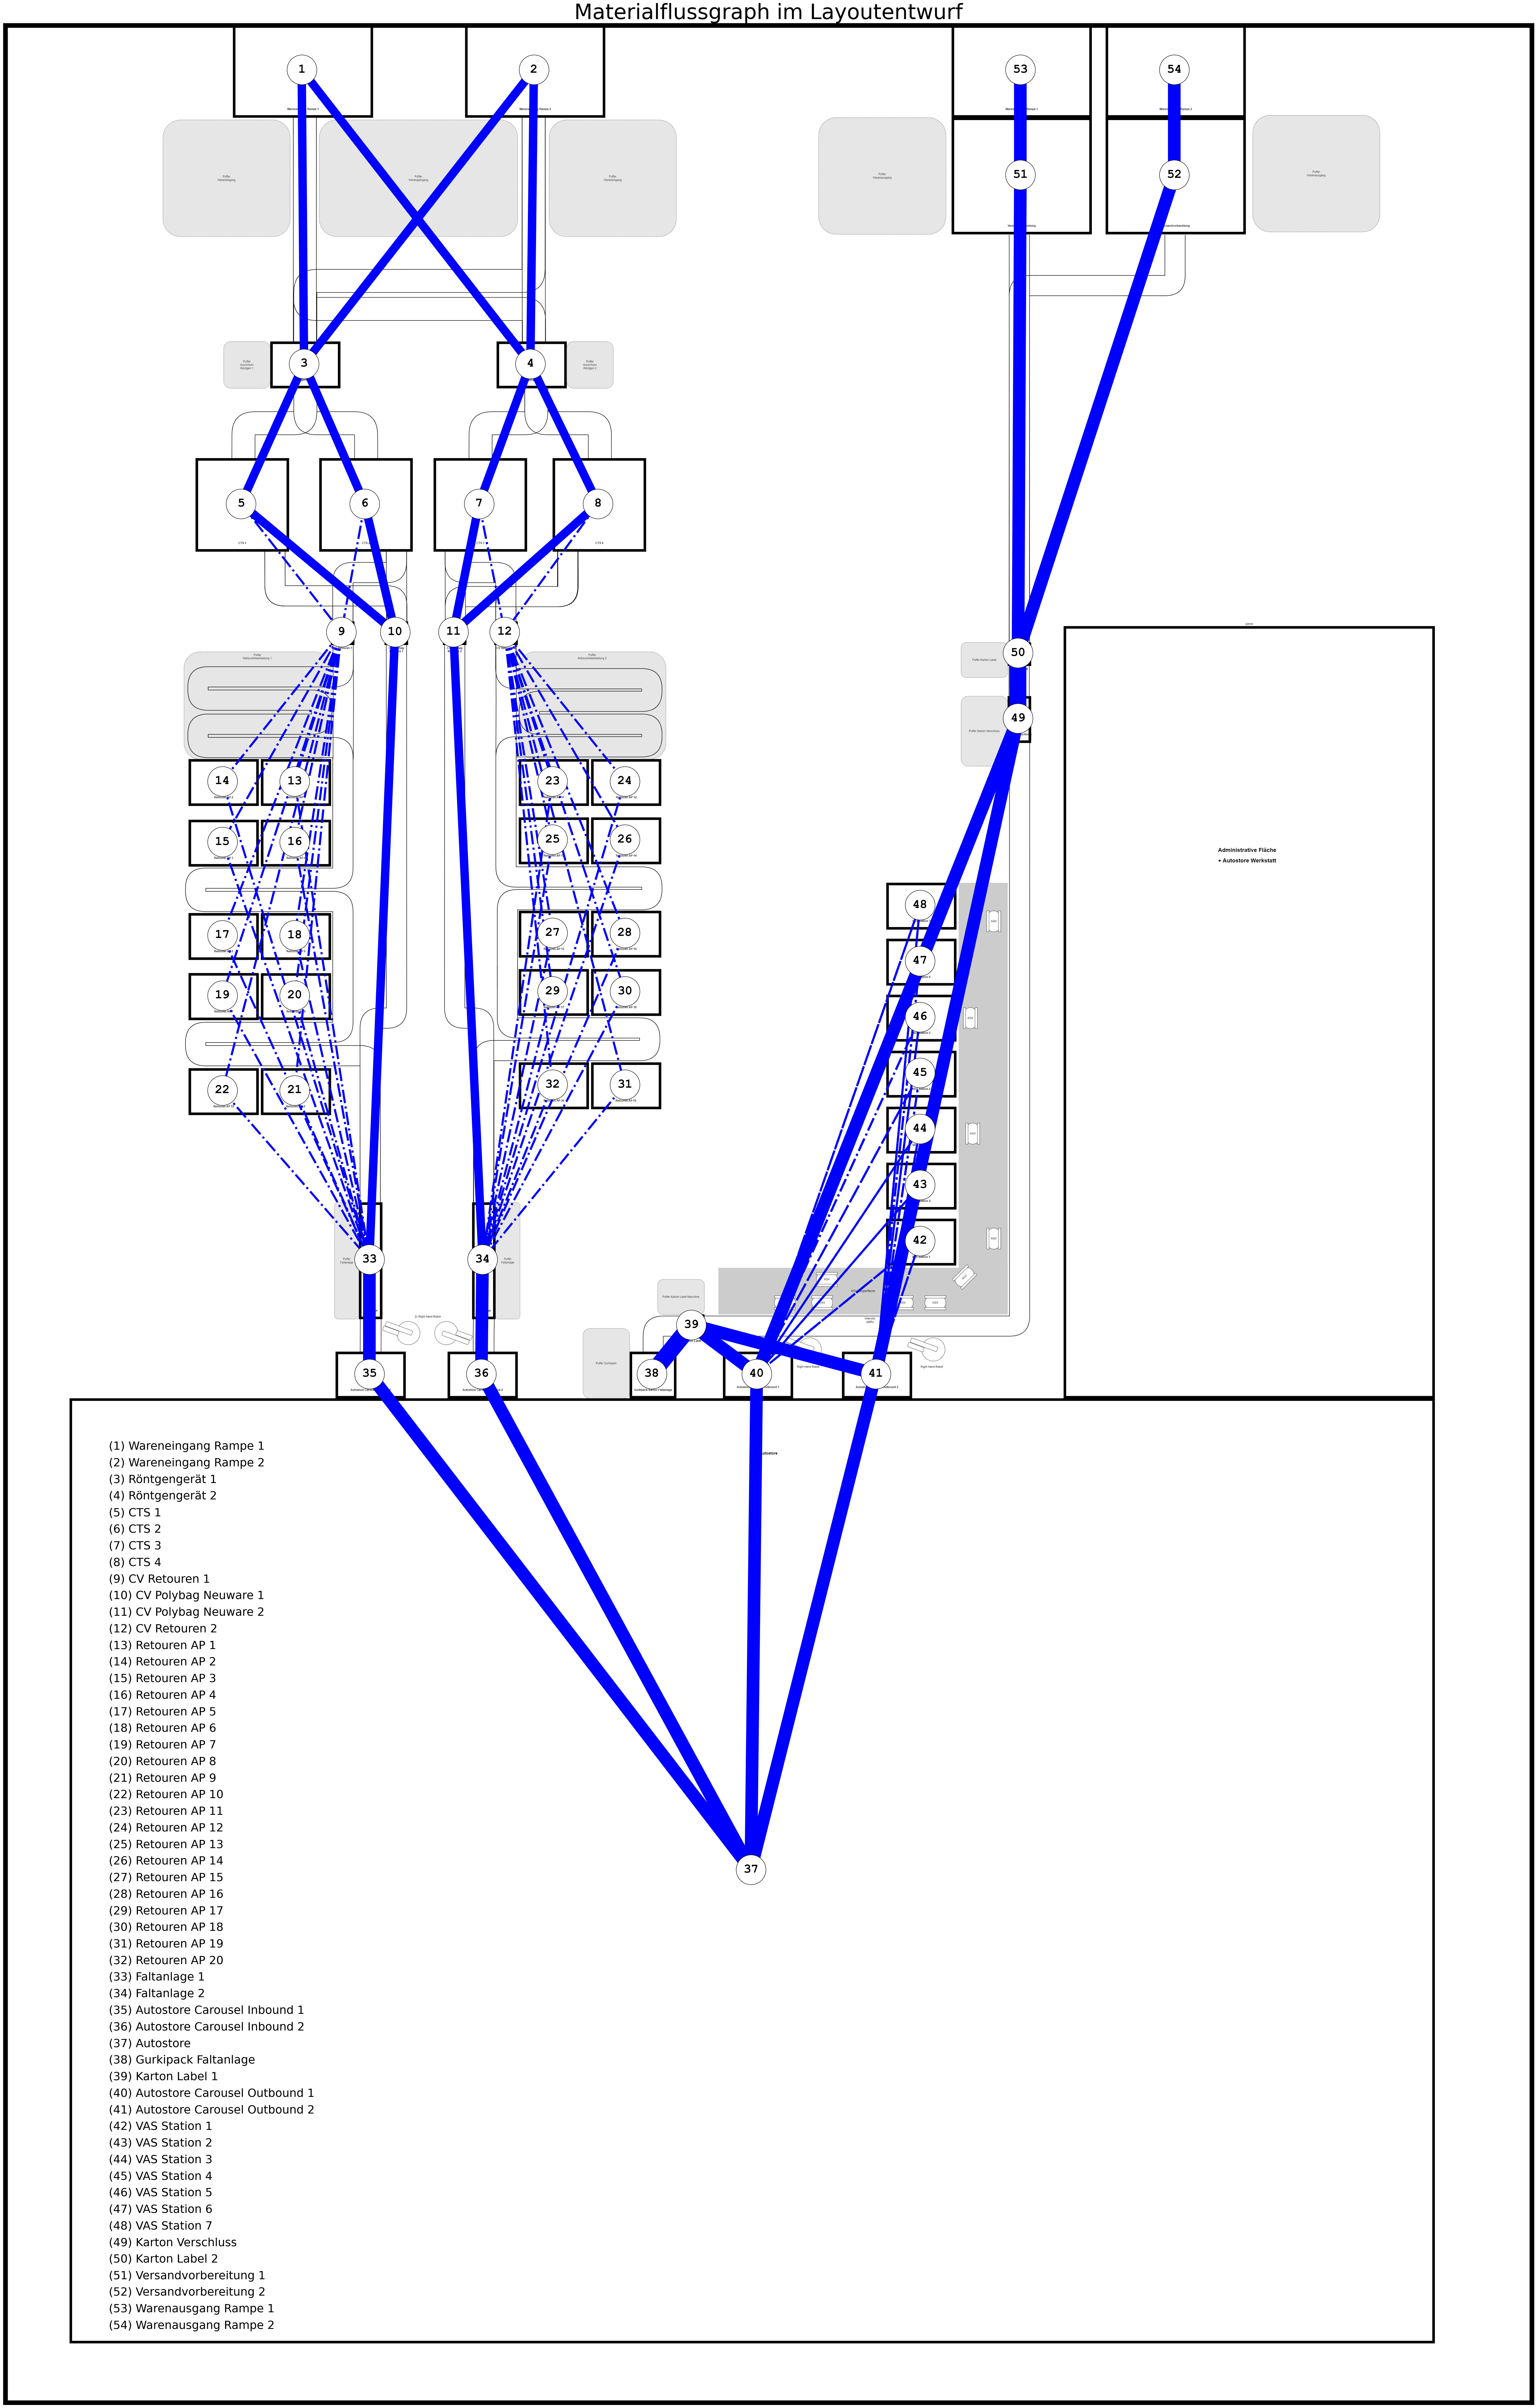

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def get_cat(value):
    """
    Kategorisierung der Quantitäten auf Basis des VDI 2498 2.3 & 2.4
    """
    percentage = value/20_000
    categories_percentages = {
        "A Absolutely necessary (Red)": (0.65, 1.0),
        "E Essential necessary (Orange)": (0.35, 0.65),
        "I Important (Orange)": (0.2, 0.35),
        "O Out of importance (Green)": (0.05, 0.2),
        "U Unimportant (Green)": (0.0, 0.05),
    }
    for key, value in categories_percentages.items():
        if percentage <= value[1] and percentage >= value[0]:
            return key

# Load the image
img = mpimg.imread('sample_2d_layout_nolegend.jpg')
img_height, img_width, _ = img.shape
plt.figure(figsize=(img_width / 100, img_height / 100))

# Create a directed graph
G = nx.DiGraph()

# Define the nodes with their integer labels
node_labels = {
    1: "Wareneingang Rampe 1",
    2: "Wareneingang Rampe 2",
    3: "Röntgengerät 1",
    4: "Röntgengerät 2",
    5: "CTS 1",
    6: "CTS 2",
    7: "CTS 3",
    8: "CTS 4",
    9: "CV Retouren 1",
    10: "CV Polybag Neuware 1",
    11: "CV Polybag Neuware 2",
    12: "CV Retouren 2",
    13: "Retouren AP 1",
    14: "Retouren AP 2",
    15: "Retouren AP 3",
    16: "Retouren AP 4",
    17: "Retouren AP 5",
    18: "Retouren AP 6",
    19: "Retouren AP 7",
    20: "Retouren AP 8",
    21: "Retouren AP 9",
    22: "Retouren AP 10",
    23: "Retouren AP 11",
    24: "Retouren AP 12",
    25: "Retouren AP 13",
    26: "Retouren AP 14",
    27: "Retouren AP 15",
    28: "Retouren AP 16",
    29: "Retouren AP 17",
    30: "Retouren AP 18",
    31: "Retouren AP 19",
    32: "Retouren AP 20",
    33: "Faltanlage 1",
    34: "Faltanlage 2",
    35: "Autostore Carousel Inbound 1",
    36: "Autostore Carousel Inbound 2",
    37: "Autostore",
    38: "Gurkipack Faltanlage",
    39: "Karton Label 1",
    40: "Autostore Carousel Outbound 1",
    41: "Autostore Carousel Outbound 2",
    42: "VAS Station 1",
    43: "VAS Station 2",
    44: "VAS Station 3",
    45: "VAS Station 4",
    46: "VAS Station 5",
    47: "VAS Station 6",
    48: "VAS Station 7",
    49: "Karton Verschluss",
    50: "Karton Label 2",
    51: "Versandvorbereitung 1",
    52: "Versandvorbereitung 2",
    53: "Warenausgang Rampe 1",
    54: "Warenausgang Rampe 2"
}
G.add_nodes_from(sorted_keys)

node_quantities_new = { 
    1: 10000,
    2: 10000,
    3: 10000,
    4: 10000,
    5: 5000,
    6: 5000,
    7: 5000,
    8: 5000,
    9: 3500,
    10: 6500,
    11: 6500,
    12: 3500,
    13: 175,
    14: 175,
    15: 175,
    16: 175,
    17: 175,
    18: 175,
    19: 175,
    20: 175,
    21: 175,
    22: 175,
    23: 175,
    24: 175,
    25: 175,
    26: 175,
    27: 175,
    28: 175,
    29: 175,
    30: 175,
    31: 175,
    32: 175,
    33: 10000,
    34: 10000,
    35: 10000,
    36: 10000,
    37: 20000,
    38: 20000,
    39: 20000,
    40: 10000,
    41: 10000,
    42: 285,
    43: 285,
    44: 285,
    45: 285,
    46: 285,
    47: 285,
    48: 285,
    49: 20000,
    50: 20000,
    51: 10000,
    52: 10000,
    53: 10000,
    54: 10000
    }

new_edges_list = [
    (1, 3),
    (1, 4),
    (2, 3),
    (2, 4),
    (3, 5),
    (3, 6),
    (4, 7),
    (4, 8),
    (5, 9),
    (6, 9),
    (7, 12),
    (8, 12),
    (5, 10),
    (6, 10),
    (7, 11),
    (8, 11),
    (10, 33),
    (11, 34),
    (34, 36),
    (33, 35),
    (35, 37),
    (36, 37),
    (37, 41),
    (37, 40),
    (39, 40),
    (39, 41),
    (40, 49),
    (41, 49),
    (49, 50),
    (50, 51),
    (51, 53),
    (38, 39),
    (50, 52),
    (52, 54),
    (9, 13),
    (9, 14),
    (9, 15),
    (9, 16),
    (9, 17),
    (9, 18),
    (9, 19),
    (9, 20),
    (9, 21),
    (9, 22),
    (12, 23),
    (12, 24),
    (12, 25),
    (12, 26),
    (12, 27),
    (12, 28),
    (12, 29),
    (12, 30),
    (12, 31),
    (12, 32),
    (13, 33),
    (14, 33),
    (15, 33),
    (16, 33),
    (17, 33),
    (18, 33),
    (19, 33),
    (20, 33),
    (21, 33),
    (22, 33),
    (23, 34),
    (24, 34),
    (25, 34),
    (26, 34),
    (27, 34),
    (28, 34),
    (29, 34),
    (30, 34),
    (31, 34),
    (32, 34),
    (40, 42),
    (40, 43),
    (40, 44),
    (40, 45),
    (40, 46),
    (40, 47),
    (40, 48),
    (41, 42),
    (41, 43),
    (41, 44),
    (41, 45),
    (41, 46),
    (41, 47),
    (41, 48),
    (42, 40),
    (43, 40),
    (44, 40),
    (45, 40),
    (46, 40),
    (47, 40),
    (48, 40),
    (42, 41),
    (43, 41),
    (44, 41),
    (45, 41),
    (46, 41),
    (47, 41),
    (48, 41)
    ]

edges_quantities_adapted = {
    # WE -> Röntgen
    (1, 3): 5000,
    (1, 4): 5000,
    (2, 3): 5000,
    (2, 4): 5000,

    # Röntgen -> CTS
    (3, 5): 5000,
    (3, 6): 5000,
    (4, 7): 5000,
    (4, 8): 5000,

    # CTS -> CV
    (5, 9): 3500,
    (5, 10): 5000,
    (6, 9): 3500,
    (6, 10): 5000,

    # CV -> Polybag/Retouren
    (7, 11): 6500,
    (7, 12): 3500,
    (8, 11): 6500,
    (8, 12): 3500,
    (9, 13): 175,
    (9, 14): 175,
    (9, 15): 175,
    (9, 16): 175,
    (9, 17): 175,
    (9, 18): 175,
    (9, 19): 175,
    (9, 20): 175,
    (9, 21): 175,
    (9, 22): 175,
    (10, 33): 6500,
    (11, 34): 6500,
    (12, 23): 175,
    (12, 24): 175,
    (12, 25): 175,
    (12, 26): 175,
    (12, 27): 175,
    (12, 28): 175,
    (12, 29): 175,
    (12, 30): 175,
    (12, 31): 175,
    (12, 32): 175,
    (13, 33): 175,
    (14, 33): 175,
    (15, 33): 175,
    (16, 33): 175,
    (17, 33): 175,
    (18, 33): 175,
    (19, 33): 175,
    (20, 33): 175,
    (21, 33): 175,
    (22, 33): 175,
    (23, 34): 175,
    (24, 34): 175,
    (25, 34): 175,
    (26, 34): 175,
    (27, 34): 175,
    (28, 34): 175,
    (29, 34): 175,
    (30, 34): 175,
    (31, 34): 175,
    (32, 34): 175,

    # Polybag
    (33, 35): 10000,
    (34, 36): 10000,

    # Autostore
    (35, 37): 10000,
    (36, 37): 10000,
    (37, 40): 10000,
    (37, 41): 10000,

    # Gurkipack -> Label -> Outbound
    (38, 39): 20000,
    (39, 40): 10000,
    (39, 41): 10000,

    # VAS via AGVs
    (40, 42): 285,
    (40, 43): 285,
    (40, 44): 285,
    (40, 45): 285,
    (40, 46): 285,
    (40, 47): 285,
    (40, 48): 285,
    (40, 49): 10000,
    (41, 42): 285,
    (41, 43): 285,
    (41, 44): 285,
    (41, 45): 285,
    (41, 46): 285,
    (41, 47): 285,
    (41, 48): 285,
    (41, 49): 10000,
    (42, 40): 285,
    (42, 41): 285,
    (43, 40): 285,
    (43, 41): 285,
    (44, 40): 285,
    (44, 41): 285,
    (45, 40): 285,
    (45, 41): 285,
    (46, 40): 285,
    (46, 41): 285,
    (47, 40): 285,
    (47, 41): 285,
    (48, 40): 285,
    (48, 41): 285,

    # Faltanlage -> Label 2
    (49, 50): 20000,

    # Warenausgang
    (50, 51): 10000,
    (50, 52): 10000,
    (51, 53): 10000,
    (52, 54): 10000
    }

edges_quantities_categories = {
    edge: get_cat(qty) for edge, qty in edges_quantities_adapted.items()
}

edge_styles = {
    "A": (40, 'solid'),
    "E": (30, 'solid'),
    "I": (20, 'solid'),
    "O": (5, 'dashdot'),
    "U": (5, 'dashdot')
}

for edge, category in edges_quantities_categories.items():
    edge_weight = edge_styles[category[0]][0]
    edge_style = edge_styles[category[0]][1]

    G.add_edge(edge[0], edge[1], weight=edge_weight, style=edge_style)

# Define the data
positionsdaten_von_david_bester_mann = {
    1: (1280, 200),
    2: (2275, 200),
    3: (1290, 1460),
    4: (2260, 1460),
    5: (1020, 2060),
    6: (1550, 2060),
    7: (2040, 2060),
    8: (2550, 2060),
    9: (1450, 2610),
    10: (1680, 2610),
    11: (1930, 2610),
    12: (2150, 2610),
    13: (1250, 3250),
    14: (940, 3250),
    15: (940, 3510),
    16: (1250, 3510),
    17: (940, 3910),
    18: (1250, 3910),
    19: (940, 4167.5),
    20: (1250, 4167.75),
    21: (1250, 4575),
    22: (940, 4575),
    23: (2355, 3250),
    24: (2665, 3250),
    25: (2355, 3500),
    26: (2665, 3500),
    27: (2355, 3900),
    28: (2665, 3900),
    29: (2355, 4150),
    30: (2665, 4150),
    31: (2665, 4550),
    32: (2355, 4550),
    33: (1570, 5300),
    34: (2055, 5300),
    35: (1570, 5790),
    36: (2050, 5790),
    37: (3205, 7915),
    38: (2780, 5790),
    39: (2950, 5580),
    40: (3230, 5790),
    41: (3740, 5790),
    42: (3930, 5220),
    43: (3930, 4980),
    44: (3930, 4740),
    45: (3930, 4500),
    46: (3930, 4260),
    47: (3930, 4020),
    48: (3930, 3780),
    49: (4350, 2980),
    50: (4350, 2700),
    51: (4360, 650),
    52: (5020, 650),
    53: (4360, 200),
    54: (5020, 200),
}
# Create the new dictionary with modifiers applied
x_mod = 1
y_mod = -1
new_positions = {
    node: (round(x * x_mod), round(y * y_mod)) for node, (x, y) in positionsdaten_von_david_bester_mann.items()
    }

plt.imshow(img, extent=[0, img_width, -img_height, 0])

nx.draw_networkx_nodes(G, new_positions, node_size=5000, node_color="white", edgecolors="black")
nx.draw_networkx_labels(G, new_positions, font_size=30, font_weight="bold", font_family="Courier New")
edge_widths = [data['weight'] for _, _, data in G.edges(data=True)]
edge_styles = [data['style'] for _, _, data in G.edges(data=True)]


# Update edge drawing with blue color and transparency
for (u, v, data), width, style in zip(G.edges(data=True), edge_widths, edge_styles):
    nx.draw_networkx_edges(G, new_positions, edgelist=[(u, v)], width=width, style=style, edge_color='blue', alpha=1, arrows=False)


# Create the legend
legend_labels = {idx: f'({idx}) {label}' for idx, label in node_labels.items()}
handles = [plt.Line2D([0], [0], color='w', label=label)
           for label in legend_labels.values()]
plt.legend(handles=handles, loc='lower left', bbox_to_anchor=(0,0), fontsize=27, frameon=False, borderpad=6)

# Show the plot
plt.title("Materialflussgraph im Layoutentwurf", fontsize=50)
plt.axis('off')
plt.show()


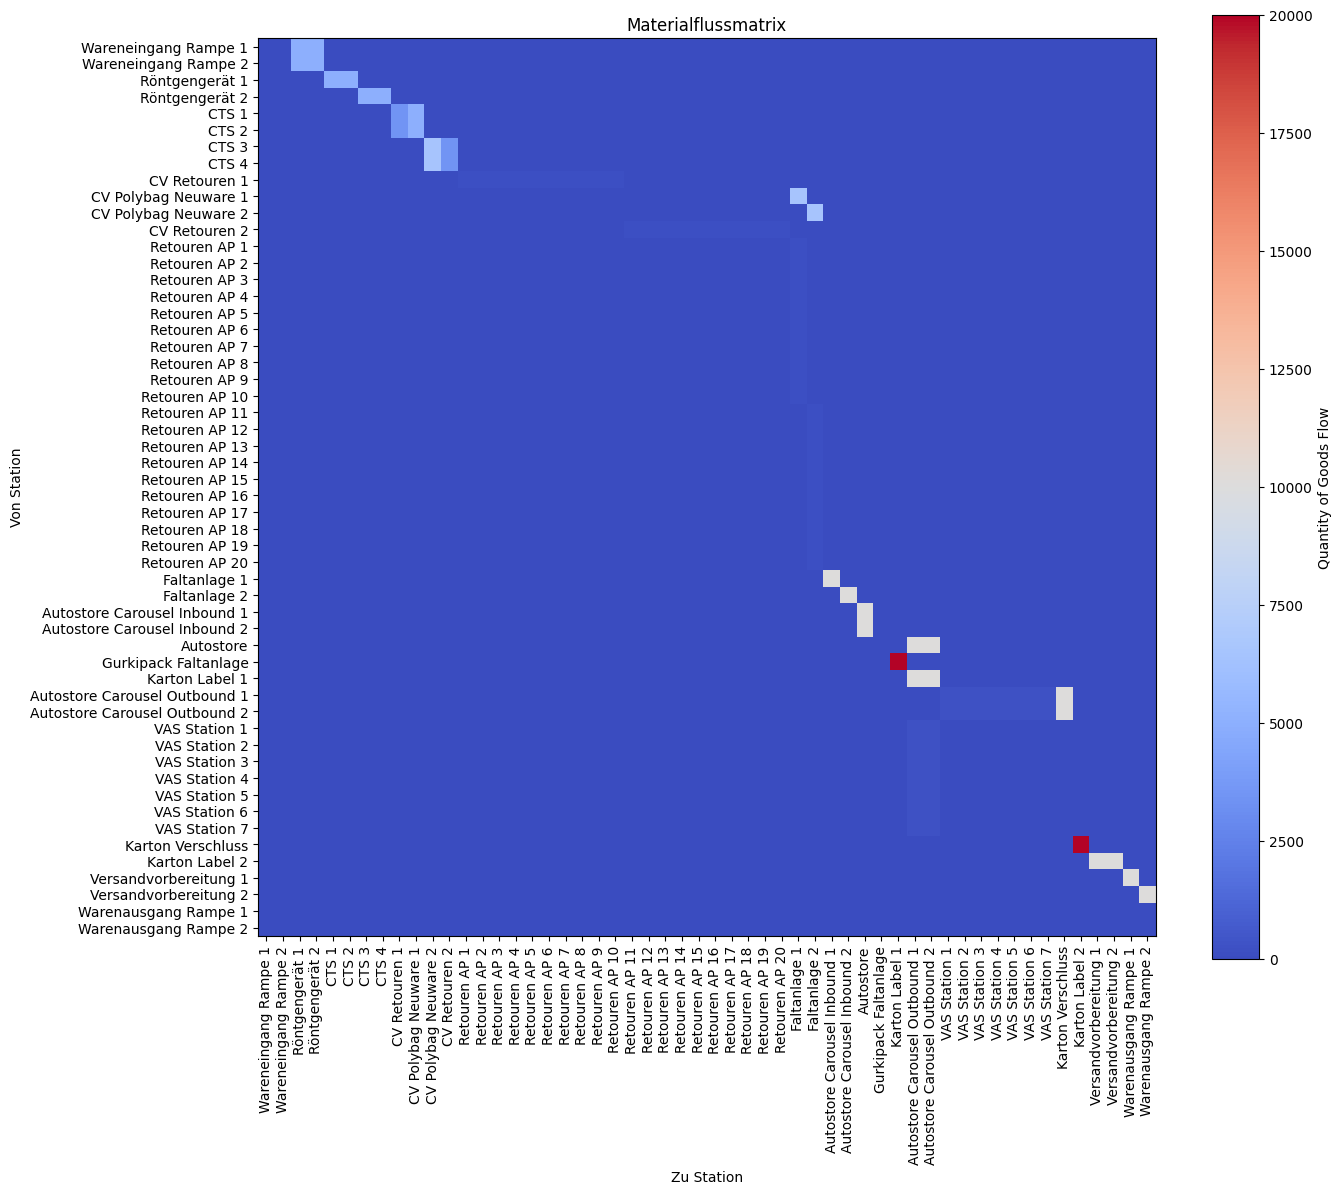

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the nodes and their indices
nodes = [
    "Wareneingang Rampe 1", "Wareneingang Rampe 2",
    "Röntgengerät 1", "Röntgengerät 2",
    "CTS 1", "CTS 2", "CTS 3", "CTS 4",
    "CV Retouren 1", "CV Polybag Neuware 1", "CV Polybag Neuware 2", "CV Retouren 2",
    "Retouren AP 1", "Retouren AP 2", "Retouren AP 3", "Retouren AP 4", "Retouren AP 5",
    "Retouren AP 6", "Retouren AP 7", "Retouren AP 8", "Retouren AP 9", "Retouren AP 10",
    "Retouren AP 11", "Retouren AP 12", "Retouren AP 13", "Retouren AP 14", "Retouren AP 15",
    "Retouren AP 16", "Retouren AP 17", "Retouren AP 18", "Retouren AP 19", "Retouren AP 20",
    "Faltanlage 1", "Faltanlage 2",
    "Autostore Carousel Inbound 1", "Autostore Carousel Inbound 2", "Autostore",
    "Gurkipack Faltanlage", "Karton Label 1",
    "Autostore Carousel Outbound 1", "Autostore Carousel Outbound 2",
    "VAS Station 1", "VAS Station 2", "VAS Station 3", "VAS Station 4", "VAS Station 5",
    "VAS Station 6", "VAS Station 7", "Karton Verschluss", "Karton Label 2",
    "Versandvorbereitung 1", "Versandvorbereitung 2",
    "Warenausgang Rampe 1", "Warenausgang Rampe 2"
]

# Initialize an empty adjacency matrix
num_nodes = len(nodes)
adjacency_matrix = np.zeros((num_nodes, num_nodes))

# Update the adjacency matrix based on edges_quantities_adapted
for (source, target), quantity in edges_quantities_adapted.items():
    source_index = nodes.index(node_labels[source])
    target_index = nodes.index(node_labels[target])
    adjacency_matrix[source_index, target_index] = quantity
np.fill_diagonal(adjacency_matrix, 0)

# Plot the heatmap
plt.figure(figsize=(14, 12))
plt.imshow(adjacency_matrix, cmap='coolwarm', interpolation='nearest')

# Add labels
plt.xticks(range(num_nodes), nodes, rotation=90)
plt.yticks(range(num_nodes), nodes)
plt.colorbar(label='Quantity of Goods Flow')

# Set title and show plot
plt.xlabel('Zu Station')
plt.ylabel('Von Station')
plt.title('Materialflussmatrix')
plt.tight_layout()
plt.show()
